In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("Food trade indicators - FAOSTAT_data_en_2-22-2024.csv")

In [3]:
df.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
0,TCL,Crops and livestock products,4,Afghanistan,5622,Import Value,F1888,Cereals and Preparations,1991,1991,1000 USD,41600.0,A,Official figure,NaN
1,TCL,Crops and livestock products,4,Afghanistan,5622,Import Value,F1888,Cereals and Preparations,1992,1992,1000 USD,25600.0,E,Estimated value,NaN
2,TCL,Crops and livestock products,4,Afghanistan,5622,Import Value,F1888,Cereals and Preparations,1993,1993,1000 USD,40000.0,E,Estimated value,NaN
3,TCL,Crops and livestock products,4,Afghanistan,5622,Import Value,F1888,Cereals and Preparations,1994,1994,1000 USD,25700.0,E,Estimated value,NaN
4,TCL,Crops and livestock products,4,Afghanistan,5622,Import Value,F1888,Cereals and Preparations,1995,1995,1000 USD,37720.0,E,Estimated value,NaN


In [4]:
unique_Items=df["Item"].unique()
print(unique_Items)


['Cereals and Preparations' 'Fats and Oils (excluding Butter)'
 'Meat and Meat Preparations' 'Sugar and Honey' 'Fruit and Vegetables'
 'Dairy Products and Eggs' 'Alcoholic Beverages' 'Non-alcoholic Beverages'
 'Other food' 'Non-food' 'Non-edible Fats and Oils' 'Tobacco']


In [5]:
# Correct the DataFrame filtering with .copy() to ensure it's a new DataFrame not a view
filtered_food_trading = df[
    (df['Element'] == 'Export Value') &
    (df['Item'].isin(['Cereals and Preparations','Fats and Oils (excluding Butter)','Sugar and Honey', 'Fruit and Vegetables','Tobacco']))].copy()

# Use .loc to safely create a new column or modify an existing one
filtered_food_trading.loc[:, 'Export Value (USD)'] = filtered_food_trading['Value'] * 1000

# Group by 'Year' and 'Area', and sum the export values to get total export value per year per area
food_trade = filtered_food_trading.groupby(['Year', 'Area','Area Code (M49)'])['Export Value (USD)'].sum().reset_index()

# Display the first 10 rows to check the data
food_trade.head(10)
##For each country each year total export value in USD

,Year,Area,Area Code (M49),Export Value (USD)
0,1991,Afghanistan,4,5.185800e+07
1,1991,Albania,8,1.795500e+07
2,1991,Algeria,12,2.868600e+07
3,1991,Angola,24,0.000000e+00
4,1991,Antigua and Barbuda,28,1.000000e+06
5,1991,Argentina,32,3.393242e+09
6,1991,Australia,36,3.360572e+09
7,1991,Austria,40,4.501220e+08
8,1991,Bahamas,44,3.153000e+06
9,1991,Bahrain,48,6.263000e+06


In [6]:
food_trade.shape

(6099, 4)

In [7]:
food_trade

,Year,Area,Area Code (M49),Export Value (USD)
0,1991,Afghanistan,4,5.185800e+07
1,1991,Albania,8,1.795500e+07
2,1991,Algeria,12,2.868600e+07
3,1991,Angola,24,0.000000e+00
4,1991,Antigua and Barbuda,28,1.000000e+06
...,...,...,...,...
6094,2022,Venezuela (Bolivarian Republic of),862,4.088837e+07
6095,2022,Viet Nam,704,1.031325e+10
6096,2022,Yemen,887,1.244098e+08
6097,2022,Zambia,894,6.314643e+08


In [8]:
duplicate_rows = food_trade[food_trade.duplicated()]

if duplicate_rows.empty:
    print("No duplicate rows found.")
else:
    print("Duplicate rows:")
    print(duplicate_rows)


No duplicate rows found.


In [9]:
Crops_production_indicators=pd.read_csv("Crops production indicators - FAOSTAT_data_en_2-22-2024.csv")

In [10]:
Crops_production_indicators.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41649 entries, 0 to 41648
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Domain Code       41649 non-null  object 
 1   Domain            41649 non-null  object 
 2   Area Code (M49)   41649 non-null  int64  
 3   Area              41649 non-null  object 
 4   Element Code      41649 non-null  int64  
 5   Element           41649 non-null  object 
 6   Item Code (CPC)   41649 non-null  object 
 7   Item              41649 non-null  object 
 8   Year Code         41649 non-null  int64  
 9   Year              41649 non-null  int64  
 10  Unit              41649 non-null  object 
 11  Value             41649 non-null  int64  
 12  Flag              41649 non-null  object 
 13  Flag Description  41649 non-null  object 
 14  Note              0 non-null      float64
dtypes: float64(1), int64(5), object(9)
memory usage: 4.8+ MB


In [11]:
# Extract numeric values from the 'Unit' column
Crops_production_indicators['Numeric_Unit'] = Crops_production_indicators['Unit'].str.extract('(\d+)').astype(int)

# Multiply 'Numeric_Unit' with 'Value' column to get the result
Crops_production_indicators['Value-g/ha'] = Crops_production_indicators['Numeric_Unit'] * Crops_production_indicators['Value']

# Concatenate the unit with the result
# Crops_production_indicators['Value-g/ha'] = Crops_production_indicators['Value-g/ha'].astype(str) + ' ' + Crops_production_indicators['Unit'].str.split().str[1]

In [12]:
crop_production=Crops_production_indicators.groupby(["Area",'Area Code (M49)',"Year"])['Value-g/ha'].mean().reset_index()


crop_production.rename(columns={
    'Value-g/ha': 'Average Yield Value-g/ha'}, inplace=True)
crop_production.head(10)

,Area,Area Code (M49),Year,Average Yield Value-g/ha
0,Afghanistan,4,2000,6.017791e+06
1,Afghanistan,4,2001,6.070127e+06
2,Afghanistan,4,2002,6.113536e+06
3,Afghanistan,4,2003,6.120918e+06
4,Afghanistan,4,2004,6.144945e+06
5,Afghanistan,4,2005,5.508718e+06
6,Afghanistan,4,2006,5.637609e+06
7,Afghanistan,4,2007,5.676164e+06
8,Afghanistan,4,2008,5.146745e+06
9,Afghanistan,4,2009,7.228036e+06


In [13]:
merged_df = pd.merge(food_trade, crop_production, on=['Year', 'Area','Area Code (M49)'],how='outer')

In [14]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6273 entries, 0 to 6272
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Year                      6273 non-null   int64  
 1   Area                      6273 non-null   object 
 2   Area Code (M49)           6273 non-null   int64  
 3   Export Value (USD)        6099 non-null   float64
 4   Average Yield Value-g/ha  4587 non-null   float64
dtypes: float64(2), int64(2), object(1)
memory usage: 245.2+ KB


In [15]:
Food_security=pd.read_csv('Food security indicators  - FAOSTAT_data_en_2-22-2024.csv')
Food_security.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36512 entries, 0 to 36511
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Domain Code       36512 non-null  object 
 1   Domain            36512 non-null  object 
 2   Area Code (M49)   36512 non-null  int64  
 3   Area              36512 non-null  object 
 4   Element Code      36512 non-null  int64  
 5   Element           36512 non-null  object 
 6   Item Code         36512 non-null  int64  
 7   Item              36512 non-null  object 
 8   Year Code         36512 non-null  int64  
 9   Year              36512 non-null  object 
 10  Unit              36512 non-null  object 
 11  Value             36512 non-null  float64
 12  Flag              36512 non-null  object 
 13  Flag Description  36512 non-null  object 
 14  Note              1 non-null      object 
dtypes: float64(1), int64(4), object(10)
memory usage: 4.2+ MB


In [16]:
Food_security = Food_security.groupby(['Year','Area','Area Code (M49)'])['Value'].sum().reset_index()

Food_security.rename(columns={
    'Value': 'Food security Value'}, inplace=True)

In [17]:
Food_security.head()

,Year,Area,Area Code (M49),Food security Value
0,2000,Afghanistan,4,91.26
1,2000,Albania,8,103.36
2,2000,Algeria,12,74.97
3,2000,Andorra,20,20.67
4,2000,Angola,24,110.16


In [18]:
# Convert 'Year' column to string type
Food_security['Year'] = Food_security['Year'].astype(str)

# Extract the first year from the range if it's a range
Food_security['Year'] = Food_security['Year'].apply(lambda x: x.split('-')[0] if '-' in x else x)

# Convert 'Year' column to integer type
Food_security['Year'] = Food_security['Year'].astype(int)


In [19]:
merged_df = pd.merge(merged_df, Food_security, on=['Year', 'Area','Area Code (M49)'],how='outer')
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10515 entries, 0 to 10514
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Year                      10515 non-null  int64  
 1   Area                      10515 non-null  object 
 2   Area Code (M49)           10515 non-null  int64  
 3   Export Value (USD)        10095 non-null  float64
 4   Average Yield Value-g/ha  8623 non-null   float64
 5   Food security Value       8580 non-null   float64
dtypes: float64(3), int64(2), object(1)
memory usage: 493.0+ KB


In [20]:
Land_temperature=pd.read_csv("Land temperature change - FAOSTAT_data_en_2-27-2024.csv")


In [21]:
Land_temperature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54810 entries, 0 to 54809
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Domain Code       54810 non-null  object 
 1   Domain            54810 non-null  object 
 2   Area Code (M49)   54810 non-null  int64  
 3   Area              54810 non-null  object 
 4   Element Code      54810 non-null  int64  
 5   Element           54810 non-null  object 
 6   Months Code       54810 non-null  int64  
 7   Months            54810 non-null  object 
 8   Year Code         54810 non-null  int64  
 9   Year              54810 non-null  int64  
 10  Unit              54810 non-null  object 
 11  Value             48255 non-null  float64
 12  Flag              54810 non-null  object 
 13  Flag Description  54810 non-null  object 
dtypes: float64(1), int64(5), object(8)
memory usage: 5.9+ MB


In [22]:
Land_temperature = Land_temperature[[ 'Area','Area Code (M49)', 'Year', 'Value']]

In [23]:
# Grouping by 'Area' and 'Year' columns, then calculate the mean value
Land_temperature = Land_temperature.groupby(['Area','Area Code (M49)', 'Year'])['Value'].mean().reset_index()
Land_temperature = Land_temperature.rename(columns={'Value': 'Avg_temperature_year'})

In [24]:
Land_temperature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5481 entries, 0 to 5480
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Area                  5481 non-null   object 
 1   Area Code (M49)       5481 non-null   int64  
 2   Year                  5481 non-null   int64  
 3   Avg_temperature_year  5268 non-null   float64
dtypes: float64(1), int64(2), object(1)
memory usage: 171.4+ KB


In [25]:
merged_df = pd.merge(merged_df, Land_temperature, on=['Year', 'Area','Area Code (M49)'],how='outer')

In [26]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11309 entries, 0 to 11308
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Year                      11309 non-null  int64  
 1   Area                      11309 non-null  object 
 2   Area Code (M49)           11309 non-null  int64  
 3   Export Value (USD)        10095 non-null  float64
 4   Average Yield Value-g/ha  8623 non-null   float64
 5   Food security Value       8580 non-null   float64
 6   Avg_temperature_year      9245 non-null   float64
dtypes: float64(4), int64(2), object(1)
memory usage: 618.6+ KB


In [27]:
Consumer_prices_indicators=pd.read_csv("Consumer prices indicators - FAOSTAT_data_en_2-22-2024.csv")


In [28]:
Consumer_prices_indicators.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112890 entries, 0 to 112889
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Domain Code       112890 non-null  object 
 1   Domain            112890 non-null  object 
 2   Area Code (M49)   112890 non-null  int64  
 3   Area              112890 non-null  object 
 4   Year Code         112890 non-null  int64  
 5   Year              112890 non-null  int64  
 6   Item Code         112890 non-null  int64  
 7   Item              112890 non-null  object 
 8   Months Code       112890 non-null  int64  
 9   Months            112890 non-null  object 
 10  Element Code      112890 non-null  int64  
 11  Element           112890 non-null  object 
 12  Unit              55227 non-null   object 
 13  Value             112890 non-null  float64
 14  Flag              112890 non-null  object 
 15  Flag Description  112890 non-null  object 
 16  Note              57

In [29]:
print(Consumer_prices_indicators["Item"].unique())

['Consumer Prices, Food Indices (2015 = 100)' 'Food price inflation']


In [30]:
Consumer_prices_indicators = Consumer_prices_indicators[Consumer_prices_indicators['Item'] == 'Food price inflation']
Consumer_prices_indicators=Consumer_prices_indicators.groupby(['Year','Area','Area Code (M49)'])['Value'].mean().reset_index()
Consumer_prices_indicators.rename(columns={
    'Value': 'Average_inflation_year'}, inplace=True)

In [31]:
Consumer_prices_indicators.head()

,Year,Area,Area Code (M49),Average_inflation_year
0,2001,Afghanistan,4,12.780692
1,2001,Albania,8,4.060863
2,2001,Algeria,12,4.573801
3,2001,Andorra,20,4.500643
4,2001,Angola,24,119.811108


In [32]:
Consumer_prices_indicators.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Year                    4653 non-null   int64  
 1   Area                    4653 non-null   object 
 2   Area Code (M49)         4653 non-null   int64  
 3   Average_inflation_year  4653 non-null   float64
dtypes: float64(1), int64(2), object(1)
memory usage: 145.5+ KB


In [33]:
merged_df = pd.merge(merged_df, Consumer_prices_indicators, on=['Year', 'Area','Area Code (M49)'],how='outer')
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11579 entries, 0 to 11578
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Year                      11579 non-null  int64  
 1   Area                      11579 non-null  object 
 2   Area Code (M49)           11579 non-null  int64  
 3   Export Value (USD)        10095 non-null  float64
 4   Average Yield Value-g/ha  8623 non-null   float64
 5   Food security Value       8580 non-null   float64
 6   Avg_temperature_year      9245 non-null   float64
 7   Average_inflation_year    8346 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 723.8+ KB


In [34]:
Emissions=pd.read_csv("Emissions - FAOSTAT_data_en_2-27-2024.csv")
Emissions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28910 entries, 0 to 28909
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Domain Code       28910 non-null  object 
 1   Domain            28910 non-null  object 
 2   Area Code (M49)   28910 non-null  int64  
 3   Area              28910 non-null  object 
 4   Element Code      28910 non-null  int64  
 5   Element           28910 non-null  object 
 6   Item Code (CPC)   28910 non-null  object 
 7   Item              28910 non-null  object 
 8   Year Code         28910 non-null  int64  
 9   Year              28910 non-null  int64  
 10  Source Code       28910 non-null  int64  
 11  Source            28910 non-null  object 
 12  Unit              28910 non-null  object 
 13  Value             28910 non-null  float64
 14  Flag              28910 non-null  object 
 15  Flag Description  28910 non-null  object 
 16  Note              0 non-null      float6

In [35]:
print(Emissions['Domain'].unique())

['Emissions from Crops' 'Emissions from Drained organic soils']


In [36]:
print(Emissions['Element'].unique())

['Crops total (Emissions N2O)' 'Crops total (Emissions CH4)'
 'Emissions (N2O)' 'Emissions (CO2)']


In [37]:
# Filter the DataFrame for emissions from crops
filtered_emission = Emissions[
    (Emissions['Domain'] == 'Emissions from Crops') &
    (Emissions['Element'].isin(['Crops total (Emissions CH4)','Crops total (Emissions N2O)']))
]

# Pivot the filtered DataFrame
Emissions_df = filtered_emission.pivot_table(
    index=['Year', 'Area', 'Area Code (M49)'],
    columns='Element',
    values='Value').reset_index()

# Replace null values with 0
Emissions_df.fillna(0, inplace=True)


print(Emissions_df.head())
# Calculate total emission
Emissions_df['Total Emission'] = Emissions_df['Crops total (Emissions CH4)'] + Emissions_df['Crops total (Emissions N2O)']

# Drop individual emission columns if needed
Emissions_df.drop(columns=['Crops total (Emissions CH4)', 'Crops total (Emissions N2O)'], inplace=True)

# Rename columns if needed
Emissions_df.columns = ['Year', 'Area', 'Area Code (M49)', 'Total Emission']

print(Emissions_df.head())
print(Emissions_df.isnull().sum())


Element  Year                 Area  Area Code (M49)  \
0        2000          Afghanistan                4   
1        2000              Albania                8   
2        2000              Algeria               12   
3        2000               Angola               24   
4        2000  Antigua and Barbuda               28   

Element  Crops total (Emissions CH4)  Crops total (Emissions N2O)  
0                            20.8471                       0.7056  
1                             0.2641                       0.1446  
2                             0.9883                       0.3698  
3                             3.0820                       0.2385  
4                             0.0001                       0.0000  
   Year                 Area  Area Code (M49)  Total Emission
0  2000          Afghanistan                4         21.5527
1  2000              Albania                8          0.4087
2  2000              Algeria               12          1.3581
3  2000      

In [38]:
Emissions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4228 entries, 0 to 4227
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             4228 non-null   int64  
 1   Area             4228 non-null   object 
 2   Area Code (M49)  4228 non-null   int64  
 3   Total Emission   4228 non-null   float64
dtypes: float64(1), int64(2), object(1)
memory usage: 132.2+ KB


In [39]:
Emissions_df.head(10)

,Year,Area,Area Code (M49),Total Emission
0,2000,Afghanistan,4,21.5527
1,2000,Albania,8,0.4087
2,2000,Algeria,12,1.3581
3,2000,Angola,24,3.3205
4,2000,Antigua and Barbuda,28,0.0001
5,2000,Argentina,32,82.4370
6,2000,Armenia,51,0.2060
7,2000,Australia,36,65.7096
8,2000,Austria,40,1.7372
9,2000,Azerbaijan,31,2.2968


In [40]:
merged_df = pd.merge(merged_df, Emissions_df, on=['Year', 'Area','Area Code (M49)'],how='outer')
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11579 entries, 0 to 11578
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Year                      11579 non-null  int64  
 1   Area                      11579 non-null  object 
 2   Area Code (M49)           11579 non-null  int64  
 3   Export Value (USD)        10095 non-null  float64
 4   Average Yield Value-g/ha  8623 non-null   float64
 5   Food security Value       8580 non-null   float64
 6   Avg_temperature_year      9245 non-null   float64
 7   Average_inflation_year    8346 non-null   float64
 8   Total Emission            8106 non-null   float64
dtypes: float64(6), int64(2), object(1)
memory usage: 814.3+ KB


In [41]:
Employment=pd.read_csv("Employment - FAOSTAT_data_en_2-27-2024.csv")
Employment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5917 entries, 0 to 5916
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Domain Code       5917 non-null   object 
 1   Domain            5917 non-null   object 
 2   Area Code (M49)   5917 non-null   int64  
 3   Area              5917 non-null   object 
 4   Indicator Code    5917 non-null   int64  
 5   Indicator         5917 non-null   object 
 6   Sex Code          5917 non-null   int64  
 7   Sex               5917 non-null   object 
 8   Year Code         5917 non-null   int64  
 9   Year              5917 non-null   int64  
 10  Element Code      5917 non-null   int64  
 11  Element           5917 non-null   object 
 12  Source Code       5917 non-null   int64  
 13  Source            5917 non-null   object 
 14  Unit              5917 non-null   object 
 15  Value             5917 non-null   float64
 16  Flag              5917 non-null   object 


In [42]:
print(Employment['Indicator'].unique())

['Mean weekly hours actually worked per employed person in agriculture, forestry and fishing'
 'Employment in agriculture, forestry and fishing - ILO modelled estimates']


In [43]:
# Filter the DataFrame for employment indicators
filtered_employment = Employment[
    Employment['Indicator'].isin(['Employment in agriculture, forestry and fishing - ILO modelled estimates',
                                  'Mean weekly hours actually worked per employed person in agriculture, forestry and fishing'])
]

# Pivot the filtered DataFrame
Employment = filtered_employment.pivot_table(
    index=['Year', 'Area', 'Area Code (M49)'],
    columns='Indicator',
    values='Value').reset_index()

# Replace null values with 0
Employment.fillna(0, inplace=True)

# Calculate total employment hours if needed
Employment['Total Employment Hours'] = Employment['Mean weekly hours actually worked per employed person in agriculture, forestry and fishing'] * Employment['Employment in agriculture, forestry and fishing - ILO modelled estimates']

# Drop individual employment columns if needed
Employment.drop(columns=['Mean weekly hours actually worked per employed person in agriculture, forestry and fishing', 'Employment in agriculture, forestry and fishing - ILO modelled estimates'], inplace=True)

# Rename columns if needed
Employment.columns = ['Year', 'Area', 'Area Code (M49)', 'Total Employment Hours']


In [44]:
Employment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4217 entries, 0 to 4216
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Year                    4217 non-null   int64  
 1   Area                    4217 non-null   object 
 2   Area Code (M49)         4217 non-null   int64  
 3   Total Employment Hours  4217 non-null   float64
dtypes: float64(1), int64(2), object(1)
memory usage: 131.9+ KB


In [45]:
Employment.head(10)

,Year,Area,Area Code (M49),Total Employment Hours
0,2000,Afghanistan,4,0.0000
1,2000,Albania,8,0.0000
2,2000,Algeria,12,0.0000
3,2000,Angola,24,0.0000
4,2000,Argentina,32,0.0000
5,2000,Armenia,51,0.0000
6,2000,Australia,36,18154.8510
7,2000,Austria,40,10582.3822
8,2000,Azerbaijan,31,0.0000
9,2000,Bahamas,44,0.0000


In [46]:
merged_df = pd.merge(merged_df, Employment, on=['Year', 'Area','Area Code (M49)'],how='outer')
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11581 entries, 0 to 11580
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Year                      11581 non-null  int64  
 1   Area                      11581 non-null  object 
 2   Area Code (M49)           11581 non-null  int64  
 3   Export Value (USD)        10095 non-null  float64
 4   Average Yield Value-g/ha  8623 non-null   float64
 5   Food security Value       8580 non-null   float64
 6   Avg_temperature_year      9245 non-null   float64
 7   Average_inflation_year    8346 non-null   float64
 8   Total Emission            8106 non-null   float64
 9   Total Employment Hours    8112 non-null   float64
dtypes: float64(7), int64(2), object(1)
memory usage: 904.9+ KB


In [47]:
Exchange_rate=pd.read_csv('Exchange rate - FAOSTAT_data_en_2-22-2024.csv')
Exchange_rate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103276 entries, 0 to 103275
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Domain Code              103276 non-null  object 
 1   Domain                   103276 non-null  object 
 2   Area Code (M49)          103276 non-null  int64  
 3   Area                     103276 non-null  object 
 4   ISO Currency Code (FAO)  103276 non-null  object 
 5   Currency                 103276 non-null  object 
 6   Element Code             103276 non-null  object 
 7   Element                  103276 non-null  object 
 8   Year Code                103276 non-null  int64  
 9   Year                     103276 non-null  int64  
 10  Months Code              103276 non-null  int64  
 11  Months                   103276 non-null  object 
 12  Unit                     0 non-null       float64
 13  Value                    103276 non-null  float64
 14  Flag

In [48]:
Exchange_rate = Exchange_rate.groupby(['Year','Area','Area Code (M49)'])['Value'].sum().reset_index()

Exchange_rate = Exchange_rate.rename(columns={'Value': 'Exchange rate'})


In [49]:
Exchange_rate.head()

,Year,Area,Area Code (M49),Exchange rate
0,1980,Afghanistan,4,529.5500
1,1980,Algeria,12,46.0494
2,1980,Angola,24,358.8000
3,1980,Anguilla,660,32.4000
4,1980,Antigua and Barbuda,28,32.4000


In [50]:
merged_df = pd.merge(merged_df, Exchange_rate, on=['Year', 'Area','Area Code (M49)'],how='outer')
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13747 entries, 0 to 13746
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Year                      13747 non-null  int64  
 1   Area                      13747 non-null  object 
 2   Area Code (M49)           13747 non-null  int64  
 3   Export Value (USD)        10095 non-null  float64
 4   Average Yield Value-g/ha  8623 non-null   float64
 5   Food security Value       8580 non-null   float64
 6   Avg_temperature_year      9245 non-null   float64
 7   Average_inflation_year    8346 non-null   float64
 8   Total Emission            8106 non-null   float64
 9   Total Employment Hours    8112 non-null   float64
 10  Exchange rate             12527 non-null  float64
dtypes: float64(8), int64(2), object(1)
memory usage: 1.2+ MB


In [51]:
Fertilizers=pd.read_csv('Fertilizers use - FAOSTAT_data_en_2-27-2024.csv')
Fertilizers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17807 entries, 0 to 17806
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Domain Code       17807 non-null  object 
 1   Domain            17807 non-null  object 
 2   Area Code (M49)   17807 non-null  int64  
 3   Area              17807 non-null  object 
 4   Element Code      17807 non-null  int64  
 5   Element           17807 non-null  object 
 6   Item Code         17807 non-null  int64  
 7   Item              17807 non-null  object 
 8   Year Code         17807 non-null  int64  
 9   Year              17807 non-null  int64  
 10  Unit              17807 non-null  object 
 11  Value             17807 non-null  float64
 12  Flag              17807 non-null  object 
 13  Flag Description  17807 non-null  object 
dtypes: float64(1), int64(5), object(8)
memory usage: 1.9+ MB


In [52]:
Fertilizers = Fertilizers.groupby(['Year','Area','Area Code (M49)'])['Value'].sum().reset_index()

In [53]:
Fertilizers = Fertilizers.rename(columns={'Value': 'Fertilizer'})



In [54]:
Fertilizers.head()

,Year,Area,Area Code (M49),Fertilizer
0,2002,Afghanistan,4,17900.0
1,2002,Albania,8,119726.0
2,2002,Armenia,51,45028.0
3,2002,Australia,36,3150982.0
4,2002,Azerbaijan,31,54898.0


In [55]:
merged_df = pd.merge(merged_df, Fertilizers, on=['Year', 'Area','Area Code (M49)'],how='outer')
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13747 entries, 0 to 13746
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Year                      13747 non-null  int64  
 1   Area                      13747 non-null  object 
 2   Area Code (M49)           13747 non-null  int64  
 3   Export Value (USD)        10095 non-null  float64
 4   Average Yield Value-g/ha  8623 non-null   float64
 5   Food security Value       8580 non-null   float64
 6   Avg_temperature_year      9245 non-null   float64
 7   Average_inflation_year    8346 non-null   float64
 8   Total Emission            8106 non-null   float64
 9   Total Employment Hours    8112 non-null   float64
 10  Exchange rate             12527 non-null  float64
 11  Fertilizer                3788 non-null   float64
dtypes: float64(9), int64(2), object(1)
memory usage: 1.3+ MB


In [56]:
Food_balances_indicator=pd.read_csv('Food balances indicators - FAOSTAT_data_en_2-22-2024.csv')
Food_balances_indicator.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148041 entries, 0 to 148040
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Domain Code       148041 non-null  object 
 1   Domain            148041 non-null  object 
 2   Area Code (M49)   148041 non-null  int64  
 3   Area              148041 non-null  object 
 4   Element Code      148041 non-null  int64  
 5   Element           148041 non-null  object 
 6   Item Code (FBS)   148041 non-null  object 
 7   Item              148041 non-null  object 
 8   Year Code         148041 non-null  int64  
 9   Year              148041 non-null  int64  
 10  Unit              148041 non-null  object 
 11  Value             148041 non-null  float64
 12  Flag              148041 non-null  object 
 13  Flag Description  148041 non-null  object 
dtypes: float64(1), int64(4), object(9)
memory usage: 15.8+ MB


In [57]:
print(Food_balances_indicator['Item'].unique())

['Cereals - Excluding Beer' 'Starchy Roots' 'Sugar Crops'
 'Sugar & Sweeteners' 'Pulses' 'Treenuts' 'Oilcrops' 'Vegetable Oils'
 'Vegetables' 'Fruits - Excluding Wine' 'Stimulants' 'Spices'
 'Alcoholic Beverages' 'Meat' 'Eggs' 'Milk - Excluding Butter'
 'Fish, Seafood']


In [58]:
print(Food_balances_indicator['Element'].unique())

['Import Quantity' 'Export Quantity' 'Losses' 'Other uses (non-food)'
 'Food']


In [59]:
# since cant filter using isin() takes 2 positional arguments to filter so using the list
items = [
    'Cereals - Excluding Beer', 'Starchy Roots', 'Sugar Crops', 'Pulses',
    'Treenuts', 'Oilcrops', 'Vegetables', 'Fruits - Excluding Wine','Spices'
]

Food_balances_indicator = Food_balances_indicator[
    (Food_balances_indicator['Element'] == 'Export Quantity') &
    (Food_balances_indicator['Item'].isin(items))
]


In [60]:
# Grouping by 'Area' (country) and 'Year', and calculate the sum of 'Value'
Food_balances_indicator = Food_balances_indicator.groupby(['Year', 'Area','Area Code (M49)'])['Value'].sum().reset_index()

# Renaming column of value
Food_balances_indicator.rename(columns={'Value': 'Export Quantity_year'}, inplace=True)

In [61]:
Food_balances_indicator.head()

,Year,Area,Area Code (M49),Export Quantity_year
0,2010,Afghanistan,4,360.0
1,2010,Albania,8,40.0
2,2010,Algeria,12,37.0
3,2010,Angola,24,0.0
4,2010,Antigua and Barbuda,28,0.0


In [62]:
merged_df = pd.merge(merged_df, Food_balances_indicator, on=['Year', 'Area','Area Code (M49)'],how='outer')
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13747 entries, 0 to 13746
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Year                      13747 non-null  int64  
 1   Area                      13747 non-null  object 
 2   Area Code (M49)           13747 non-null  int64  
 3   Export Value (USD)        10095 non-null  float64
 4   Average Yield Value-g/ha  8623 non-null   float64
 5   Food security Value       8580 non-null   float64
 6   Avg_temperature_year      9245 non-null   float64
 7   Average_inflation_year    8346 non-null   float64
 8   Total Emission            8106 non-null   float64
 9   Total Employment Hours    8112 non-null   float64
 10  Exchange rate             12527 non-null  float64
 11  Fertilizer                3788 non-null   float64
 12  Export Quantity_year      4152 non-null   float64
dtypes: float64(10), int64(2), object(1)
memory usage: 1.4+ MB


In [63]:
Pesticides_use=pd.read_csv('Pesticides use - FAOSTAT_data_en_2-27-2024.csv')
Pesticides_use.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35202 entries, 0 to 35201
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Domain Code       35202 non-null  object 
 1   Domain            35202 non-null  object 
 2   Area Code (M49)   35202 non-null  int64  
 3   Area              35202 non-null  object 
 4   Element Code      35202 non-null  int64  
 5   Element           35202 non-null  object 
 6   Item Code         35202 non-null  int64  
 7   Item              35202 non-null  object 
 8   Year Code         35202 non-null  int64  
 9   Year              35202 non-null  int64  
 10  Unit              35202 non-null  object 
 11  Value             35202 non-null  float64
 12  Flag              35202 non-null  object 
 13  Flag Description  35202 non-null  object 
 14  Note              198 non-null    object 
dtypes: float64(1), int64(5), object(9)
memory usage: 4.0+ MB


In [64]:
print(Pesticides_use['Element'].unique())

['Agricultural Use' 'Use per area of cropland'
 'Use per value of agricultural production']


In [65]:
print(Pesticides_use['Item'].unique())

['Pesticides (total)' 'Insecticides' 'Herbicides'
 'Fungicides and Bactericides' 'Fungicides – Seed treatments'
 'Insecticides – Seed Treatments' 'Rodenticides']


In [66]:
print(Pesticides_use['Unit'].unique())

['t' 'kg/ha' 'g/Int$']


In [67]:
# will try bring all the units in tons

# Define conversion factors for different units
conversion_factors = {'kg/ha': 1 / 1000, 'g/Int$': 1 / 1_000_000_000}

# Convert values based on unit
for unit, conversion_factor in conversion_factors.items():
    Pesticides_use.loc[Pesticides_use['Unit'] == unit, 'Value'] *= conversion_factor

Pesticides_use.rename(columns={'Value': 'Pesticides_tons'}, inplace=True)


In [68]:
Pesticides_use.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Pesticides_tons,Flag,Flag Description,Note
0,RP,Pesticides Use,8,Albania,5157,Agricultural Use,1357,Pesticides (total),2000,2000,t,3.079800e+02,E,Estimated value,NaN
1,RP,Pesticides Use,8,Albania,5159,Use per area of cropland,1357,Pesticides (total),2000,2000,kg/ha,4.400000e-04,E,Estimated value,NaN
2,RP,Pesticides Use,8,Albania,5173,Use per value of agricultural production,1357,Pesticides (total),2000,2000,g/Int$,2.300000e-10,E,Estimated value,NaN
3,RP,Pesticides Use,8,Albania,5157,Agricultural Use,1357,Pesticides (total),2001,2001,t,3.193800e+02,E,Estimated value,NaN
4,RP,Pesticides Use,8,Albania,5159,Use per area of cropland,1357,Pesticides (total),2001,2001,kg/ha,4.600000e-04,E,Estimated value,NaN


In [69]:
Pesticides_use = Pesticides_use.groupby(['Year','Area','Area Code (M49)'])['Pesticides_tons'].sum().reset_index()
Pesticides_use.head()

,Year,Area,Area Code (M49),Pesticides_tons
0,2000,Albania,8,607.90044
1,2000,Algeria,12,3931.30031
2,2000,Andorra,20,35.48855
3,2000,Angola,24,80.00001
4,2000,Anguilla,660,41.25000


In [70]:
merged_df = pd.merge(merged_df, Pesticides_use, on=['Year', 'Area','Area Code (M49)'],how='outer')
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13769 entries, 0 to 13768
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Year                      13769 non-null  int64  
 1   Area                      13769 non-null  object 
 2   Area Code (M49)           13769 non-null  int64  
 3   Export Value (USD)        10095 non-null  float64
 4   Average Yield Value-g/ha  8623 non-null   float64
 5   Food security Value       8580 non-null   float64
 6   Avg_temperature_year      9245 non-null   float64
 7   Average_inflation_year    8346 non-null   float64
 8   Total Emission            8106 non-null   float64
 9   Total Employment Hours    8112 non-null   float64
 10  Exchange rate             12527 non-null  float64
 11  Fertilizer                3788 non-null   float64
 12  Export Quantity_year      4152 non-null   float64
 13  Pesticides_tons           8566 non-null   float64
dtypes: flo

In [71]:
Land_use=pd.read_csv('Land use - FAOSTAT_data_en_2-22-2024.csv')
Land_use.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97995 entries, 0 to 97994
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Domain Code       97995 non-null  object 
 1   Domain            97995 non-null  object 
 2   Area Code (M49)   97995 non-null  int64  
 3   Area              97995 non-null  object 
 4   Element Code      97995 non-null  int64  
 5   Element           97995 non-null  object 
 6   Item Code         97995 non-null  int64  
 7   Item              97995 non-null  object 
 8   Year Code         97995 non-null  int64  
 9   Year              97995 non-null  int64  
 10  Unit              97995 non-null  object 
 11  Value             97995 non-null  float64
 12  Flag              97995 non-null  object 
 13  Flag Description  97995 non-null  object 
 14  Note              1 non-null      object 
dtypes: float64(1), int64(5), object(9)
memory usage: 11.2+ MB


<ipython-input-71-9a22cb3a9e64>:1: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  Land_use=pd.read_csv('Land use - FAOSTAT_data_en_2-22-2024.csv')


In [72]:
Land_use = Land_use.groupby(['Year','Area','Area Code (M49)'])['Value'].sum().reset_index()

In [73]:
Land_use = Land_use.rename(columns={'Value': 'Total_land_in_use'})
Land_use.head()

,Year,Area,Area Code (M49),Total_land_in_use
0,1980,Afghanistan,4,255210.00
1,1980,Albania,8,10042.00
2,1980,Algeria,12,615600.00
3,1980,American Samoa,16,47.72
4,1980,Andorra,20,164.00


In [74]:
merged_df = pd.merge(merged_df, Land_use, on=['Year', 'Area','Area Code (M49)'],how='outer')
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14548 entries, 0 to 14547
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Year                      14548 non-null  int64  
 1   Area                      14548 non-null  object 
 2   Area Code (M49)           14548 non-null  int64  
 3   Export Value (USD)        10095 non-null  float64
 4   Average Yield Value-g/ha  8623 non-null   float64
 5   Food security Value       8580 non-null   float64
 6   Avg_temperature_year      9245 non-null   float64
 7   Average_inflation_year    8346 non-null   float64
 8   Total Emission            8106 non-null   float64
 9   Total Employment Hours    8112 non-null   float64
 10  Exchange rate             12527 non-null  float64
 11  Fertilizer                3788 non-null   float64
 12  Export Quantity_year      4152 non-null   float64
 13  Pesticides_tons           8566 non-null   float64
 14  Total_

In [75]:
Foreign_direct_investment=pd.read_csv('Foreign direct investment - FAOSTAT_data_en_2-27-2024.csv')
Foreign_direct_investment.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
0,FDI,Foreign Direct Investment (FDI),4,Afghanistan,6110,Value US$,23082,Total FDI inflows,2000,2000,million USD,0.17,X,Figure from international organizations,UNCTAD
1,FDI,Foreign Direct Investment (FDI),4,Afghanistan,6110,Value US$,23082,Total FDI inflows,2001,2001,million USD,0.68,X,Figure from international organizations,UNCTAD
2,FDI,Foreign Direct Investment (FDI),4,Afghanistan,6110,Value US$,23082,Total FDI inflows,2002,2002,million USD,50.00,X,Figure from international organizations,UNCTAD
3,FDI,Foreign Direct Investment (FDI),4,Afghanistan,6110,Value US$,23082,Total FDI inflows,2003,2003,million USD,57.80,X,Figure from international organizations,UNCTAD
4,FDI,Foreign Direct Investment (FDI),4,Afghanistan,6110,Value US$,23082,Total FDI inflows,2004,2004,million USD,186.90,X,Figure from international organizations,UNCTAD


In [76]:
Foreign_direct_investment=Foreign_direct_investment.groupby(['Year','Area','Area Code (M49)'])['Value'].sum().reset_index()
Foreign_direct_investment.rename(columns={'Value': 'Foreign_direct_investment'}, inplace=True)


In [77]:
Foreign_direct_investment.head()

,Year,Area,Area Code (M49),Foreign_direct_investment
0,2000,Afghanistan,4,0.170000
1,2000,Albania,8,144.270315
2,2000,Algeria,12,293.800000
3,2000,Angola,24,878.601000
4,2000,Anguilla,660,39.713785


In [78]:
merged_df = pd.merge(merged_df, Foreign_direct_investment, on=['Year', 'Area','Area Code (M49)'],how='outer')
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14553 entries, 0 to 14552
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year                       14553 non-null  int64  
 1   Area                       14553 non-null  object 
 2   Area Code (M49)            14553 non-null  int64  
 3   Export Value (USD)         10095 non-null  float64
 4   Average Yield Value-g/ha   8623 non-null   float64
 5   Food security Value        8580 non-null   float64
 6   Avg_temperature_year       9245 non-null   float64
 7   Average_inflation_year     8346 non-null   float64
 8   Total Emission             8106 non-null   float64
 9   Total Employment Hours     8112 non-null   float64
 10  Exchange rate              12527 non-null  float64
 11  Fertilizer                 3788 non-null   float64
 12  Export Quantity_year       4152 non-null   float64
 13  Pesticides_tons            8566 non-null   flo

In [79]:
merged_df.to_csv('merged_df.csv', index=False)

In [80]:
merged_df.isnull().sum()

Year                             0
Area                             0
Area Code (M49)                  0
Export Value (USD)            4458
Average Yield Value-g/ha      5930
Food security Value           5973
Avg_temperature_year          5308
Average_inflation_year        6207
Total Emission                6447
Total Employment Hours        6441
Exchange rate                 2026
Fertilizer                   10765
Export Quantity_year         10401
Pesticides_tons               5987
Total_land_in_use              950
Foreign_direct_investment     6024
dtype: int64

In [81]:
# Perform EDA
eda = merged_df.describe(include='all').T
eda['null_count'] = merged_df.isnull().sum()
eda['unique_values'] = merged_df.nunique()
eda['data_type'] = merged_df.dtypes
eda

,count,unique,top,freq,mean,std,min,25%,50%,75%,max,null_count,unique_values,data_type
Year,14553.0,NaN,NaN,NaN,2004.327767,11.639386,1980.0,1996.0,2006.0,2014.0,2023.0,0,44,int64
Area,14553,258,Belgium,65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,258,object
Area Code (M49),14553.0,NaN,NaN,NaN,434.421219,254.240575,4.0,214.0,430.0,659.0,894.0,0,258,int64
Export Value (USD),10095.0,NaN,NaN,NaN,2300655189.552254,6017245400.792728,0.0,15934855.0,207252610.0,1279645070.0,69757689900.0,4458,5854,float64
Average Yield Value-g/ha,8623.0,NaN,NaN,NaN,10498790.338828,5885586.906496,53550.0,6440306.363636,9887136.363636,13557597.272727,71813800.0,5930,4580,float64
Food security Value,8580.0,NaN,NaN,NaN,160.093931,145.448297,-419.5,72.44,124.705,236.0,5735.0,5973,6156,float64
Avg_temperature_year,9245.0,NaN,NaN,NaN,0.83944,0.444415,-0.3715,0.5485,0.735375,1.0181,3.6908,5308,4378,float64
Average_inflation_year,8346.0,NaN,NaN,NaN,52.37867,2300.192635,-18.127214,1.685436,4.103055,8.53133,143491.554426,6207,4653,float64
Total Emission,8106.0,NaN,NaN,NaN,164.410172,712.289064,0.0,0.2488,3.2478,31.302075,5779.7976,6447,3636,float64
Total Employment Hours,8112.0,NaN,NaN,NaN,122105.778773,1065659.621242,0.0,0.0,0.0,9194.02995,19166316.252,6441,1697,float64


In [82]:
# Group the DataFrame by 'Area' and 'Year'
grouped = merged_df.groupby(['Area', 'Year'])
# df[df['Year'] > 2000]
# Iterate over the groups and print missing combinations
for (area, year), group_df in grouped:
    # Check if any missing values in the group
    missing_values = group_df[group_df['Export Value (USD)'].isnull()]

    # If missing values exist, print them
    if not missing_values.empty:
        print(f"Missing values for Area: {area}, Year: {year}:")
        print(missing_values[['Area', 'Year', 'Export Value (USD)']])
        print()


Streaming output truncated to the last 5000 lines.

Missing values for Area: Portugal, Year: 1983:
           Area  Year  Export Value (USD)
12197  Portugal  1983                 NaN

Missing values for Area: Portugal, Year: 1984:
           Area  Year  Export Value (USD)
12363  Portugal  1984                 NaN

Missing values for Area: Portugal, Year: 1985:
           Area  Year  Export Value (USD)
12532  Portugal  1985                 NaN

Missing values for Area: Portugal, Year: 1986:
           Area  Year  Export Value (USD)
12702  Portugal  1986                 NaN

Missing values for Area: Portugal, Year: 1987:
           Area  Year  Export Value (USD)
12872  Portugal  1987                 NaN

Missing values for Area: Portugal, Year: 1988:
           Area  Year  Export Value (USD)
13042  Portugal  1988                 NaN

Missing values for Area: Portugal, Year: 1989:
           Area  Year  Export Value (USD)
13212  Portugal  1989                 NaN

Missing values for Area:

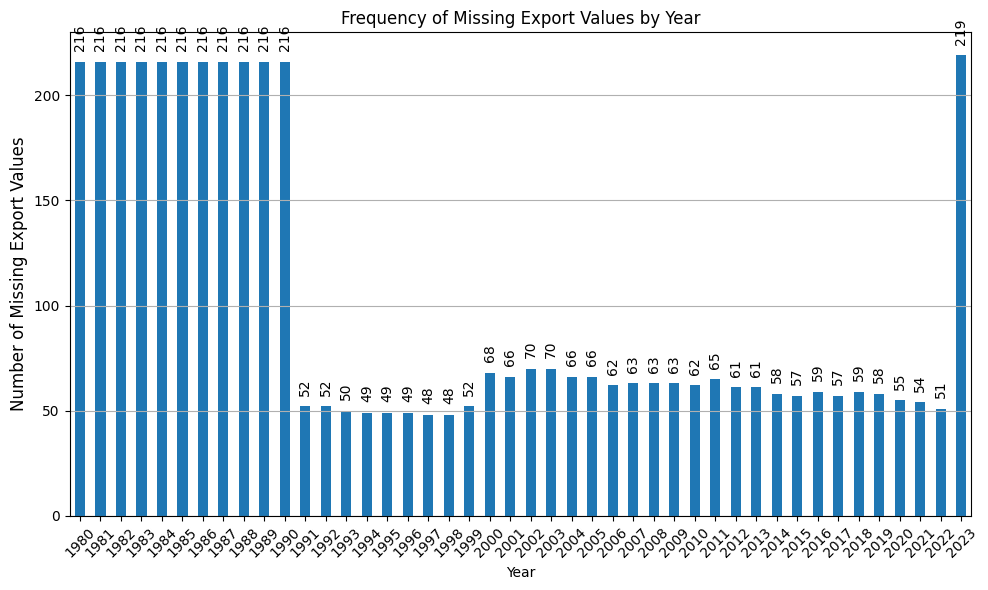

In [83]:
import matplotlib.pyplot as plt

# Count the number of missing values for 'Export Value (USD)' column for each year
missing_counts = merged_df[merged_df['Export Value (USD)'].isnull()].groupby('Year').size()


# Plot the bar plot
plt.figure(figsize=(10, 6))
missing_counts.plot(kind='bar')
plt.title('Frequency of Missing Export Values by Year')
plt.xlabel('Year')
plt.ylabel('Number of Missing Export Values', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y')
# Add numbers on top of the bars
for i, v in enumerate(missing_counts):
    plt.text(i, v + 5, str(v), ha='center', va='bottom', rotation=90)
plt.tight_layout()
plt.show()


In [84]:
merged_df_filtered_on_year = merged_df[merged_df['Year'] >= 2000]
merged_df_filtered_on_year

,Year,Area,Area Code (M49),Export Value (USD),Average Yield Value-g/ha,Food security Value,Avg_temperature_year,Average_inflation_year,Total Emission,Total Employment Hours,Exchange rate,Fertilizer,Export Quantity_year,Pesticides_tons,Total_land_in_use,Foreign_direct_investment
1663,2000,Afghanistan,4,31080000.0,6.017791e+06,91.26,0.9128,NaN,21.5527,0.0,568290.89676,NaN,NaN,NaN,254888.0,0.170000
1664,2000,Afghanistan,4,31080000.0,6.017791e+06,418.40,0.9128,NaN,21.5527,0.0,568290.89676,NaN,NaN,NaN,254888.0,0.170000
1665,2000,Albania,8,9619000.0,8.590027e+06,103.36,0.9002,NaN,0.4087,0.0,1724.51300,NaN,NaN,607.90044,10086.0,144.270315
1666,2000,Albania,8,9619000.0,8.590027e+06,349.50,0.9002,NaN,0.4087,0.0,1724.51300,NaN,NaN,607.90044,10086.0,144.270315
1667,2000,Algeria,12,17875330.0,4.602200e+06,74.97,0.6867,NaN,1.3581,0.0,903.11750,NaN,NaN,3931.30031,605203.8,293.800000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14548,2007,Sint Maarten (Dutch part),534,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.396648
14549,2008,Sint Maarten (Dutch part),534,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,101.379888
14550,2009,Sint Maarten (Dutch part),534,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.368715
14551,2015,Serbia and Montenegro,891,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.440000


In [85]:
merged_df_filtered_on_year.isnull().sum()

Year                            0
Area                            0
Area Code (M49)                 0
Export Value (USD)           1633
Average Yield Value-g/ha     1442
Food security Value          1485
Avg_temperature_year          820
Average_inflation_year       1719
Total Emission               1959
Total Employment Hours       1953
Exchange rate                1108
Fertilizer                   6277
Export Quantity_year         5913
Pesticides_tons              1499
Total_land_in_use             807
Foreign_direct_investment    1536
dtype: int64

In [86]:
merged_df_filtered_on_year.to_csv('merged_df_filtered_on_year.csv', index=False)
merged_df_filtered_on_year = merged_df_filtered_on_year.drop('Area', axis=1)


In [87]:
merged_df_filtered_on_year.fillna(merged_df_filtered_on_year.mean(), inplace=True)


In [88]:
merged_df_filtered_on_year.isnull().sum()

Year                         0
Area Code (M49)              0
Export Value (USD)           0
Average Yield Value-g/ha     0
Food security Value          0
Avg_temperature_year         0
Average_inflation_year       0
Total Emission               0
Total Employment Hours       0
Exchange rate                0
Fertilizer                   0
Export Quantity_year         0
Pesticides_tons              0
Total_land_in_use            0
Foreign_direct_investment    0
dtype: int64

In [89]:
merged_df_filtered_on_year.dtypes

Year                           int64
Area Code (M49)                int64
Export Value (USD)           float64
Average Yield Value-g/ha     float64
Food security Value          float64
Avg_temperature_year         float64
Average_inflation_year       float64
Total Emission               float64
Total Employment Hours       float64
Exchange rate                float64
Fertilizer                   float64
Export Quantity_year         float64
Pesticides_tons              float64
Total_land_in_use            float64
Foreign_direct_investment    float64
dtype: object

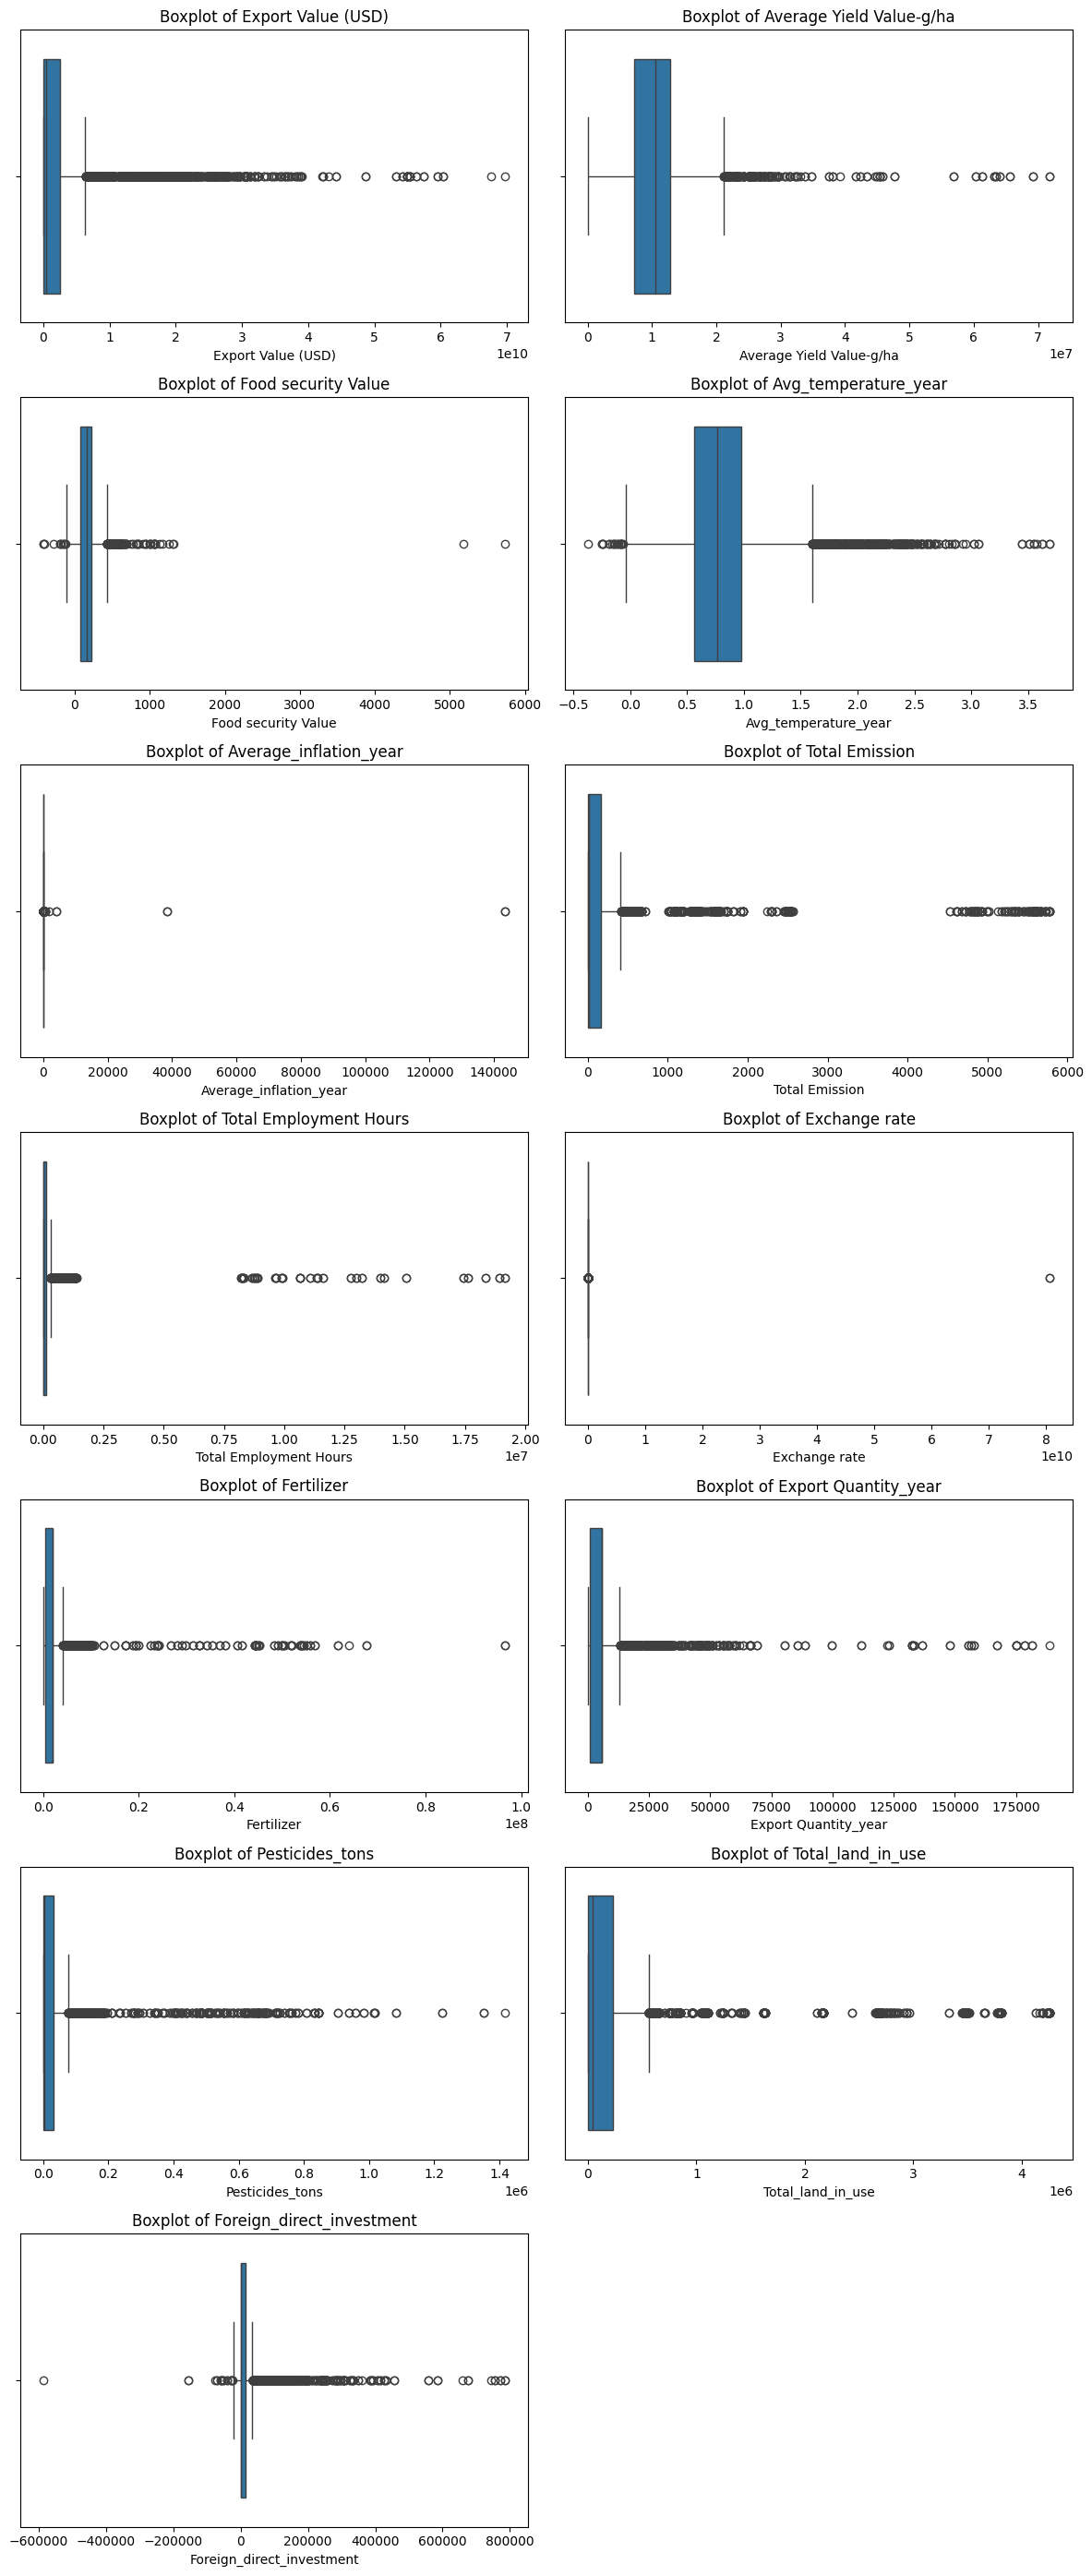

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming merged_df_filtered_on_year is your DataFrame with float64 columns identified

# Identify float64 columns
float_cols = merged_df_filtered_on_year.select_dtypes(include=['float64']).columns

# Dictionary to hold outliers for each float column
outliers_dict = {}

# Determine the layout for subplots based on the number of float columns
n_cols = 2  # Number of columns in the subplot grid
n_rows = (len(float_cols) + 1) // n_cols  # Calculate required number of rows, rounded up

# Set up the matplotlib figure
plt.figure(figsize=(12, n_rows * 4))  # Adjust the size as needed, with height based on the number of rows

# Loop through each float column to calculate IQR, identify outliers, and create a boxplot
for i, column in enumerate(float_cols):
    # Calculate IQR
    Q1 = merged_df_filtered_on_year[column].quantile(0.25)
    Q3 = merged_df_filtered_on_year[column].quantile(0.75)
    IQR = Q3 - Q1
    outliers = merged_df_filtered_on_year[(merged_df_filtered_on_year[column] < (Q1 - 1.5 * IQR)) | (merged_df_filtered_on_year[column] > (Q3 + 1.5 * IQR))]

    # Store outliers in a dictionary
    outliers_dict[column] = outliers

    # Create a subplot for the boxplot
    plt.subplot(n_rows, n_cols, i + 1)
    sns.boxplot(x=merged_df_filtered_on_year[column])
    plt.title(f'Boxplot of {column}')  # Title the subplot with the column name

# Adjust layout to prevent overlapping of plots
plt.tight_layout()
plt.show()


In [91]:
from scipy import stats

# Identify float64 columns in the DataFrame
float_cols = merged_df_filtered_on_year.select_dtypes(include=['float64']).columns

# Calculate Z-scores for the identified float columns
z_scores = stats.zscore(merged_df_filtered_on_year[float_cols])

# Set the threshold for outlier detection (e.g., 3 standard deviations)
threshold = 3

# Create a mask to filter data within the threshold
outlier_mask = (np.abs(z_scores) < threshold).all(axis=1)

# Apply the mask to filter the DataFrame and retain non-outliers
Final_df = merged_df_filtered_on_year[outlier_mask]


In [92]:
Final_df.isnull().sum()

Year                         0
Area Code (M49)              0
Export Value (USD)           0
Average Yield Value-g/ha     0
Food security Value          0
Avg_temperature_year         0
Average_inflation_year       0
Total Emission               0
Total Employment Hours       0
Exchange rate                0
Fertilizer                   0
Export Quantity_year         0
Pesticides_tons              0
Total_land_in_use            0
Foreign_direct_investment    0
dtype: int64

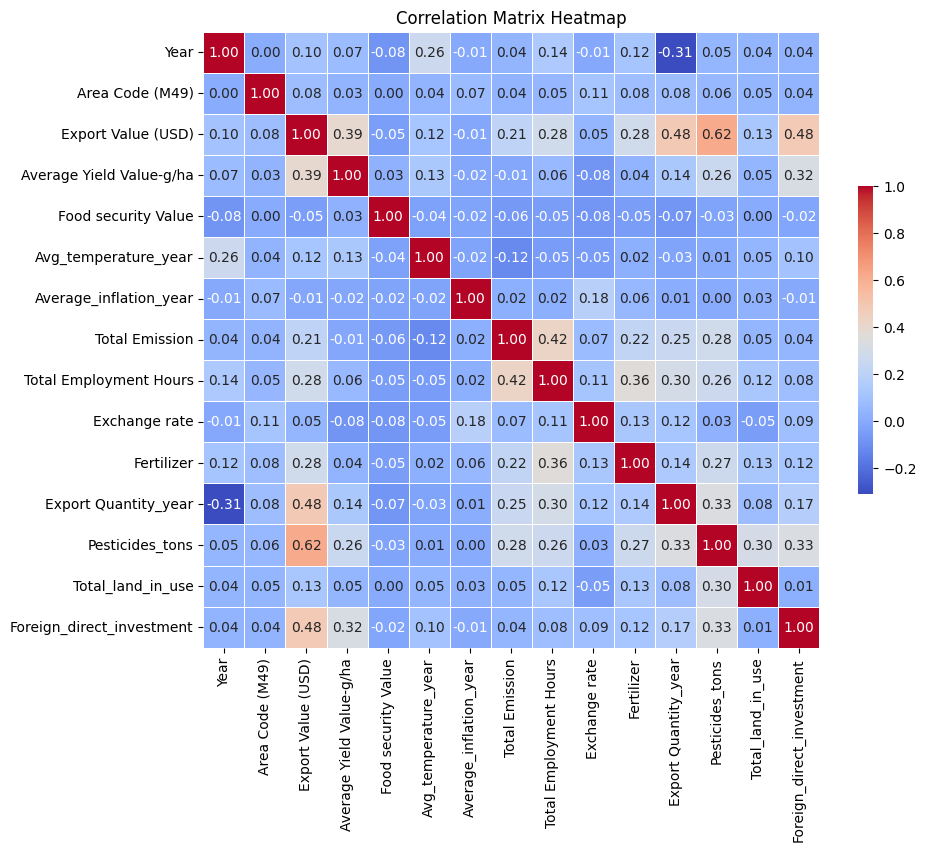

In [93]:
# Calculate the correlation matrix
corr_matrix = Final_df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))  # Adjust the size to fit your dataset

# Draw the heatmap with annotations, formatting, and colormap
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm',
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title('Correlation Matrix Heatmap')
plt.show()


In [94]:
# Based on correlation Matrix Heatmap droping the Food security Value And even if its negestive im trying to consider Average_inflation_year because its an importatnt column in export

Final_df.drop(columns=['Food security Value'], inplace=True)


<ipython-input-94-bfb02d4c6bc2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Final_df.drop(columns=['Food security Value'], inplace=True)


/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py:329: RuntimeWarning: invalid value encountered in log1p
  result = func(self.values, **kwargs)
<ipython-input-95-39ee9049dc82>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Final_df[float_cols] = np.log1p(Final_df[float_cols])


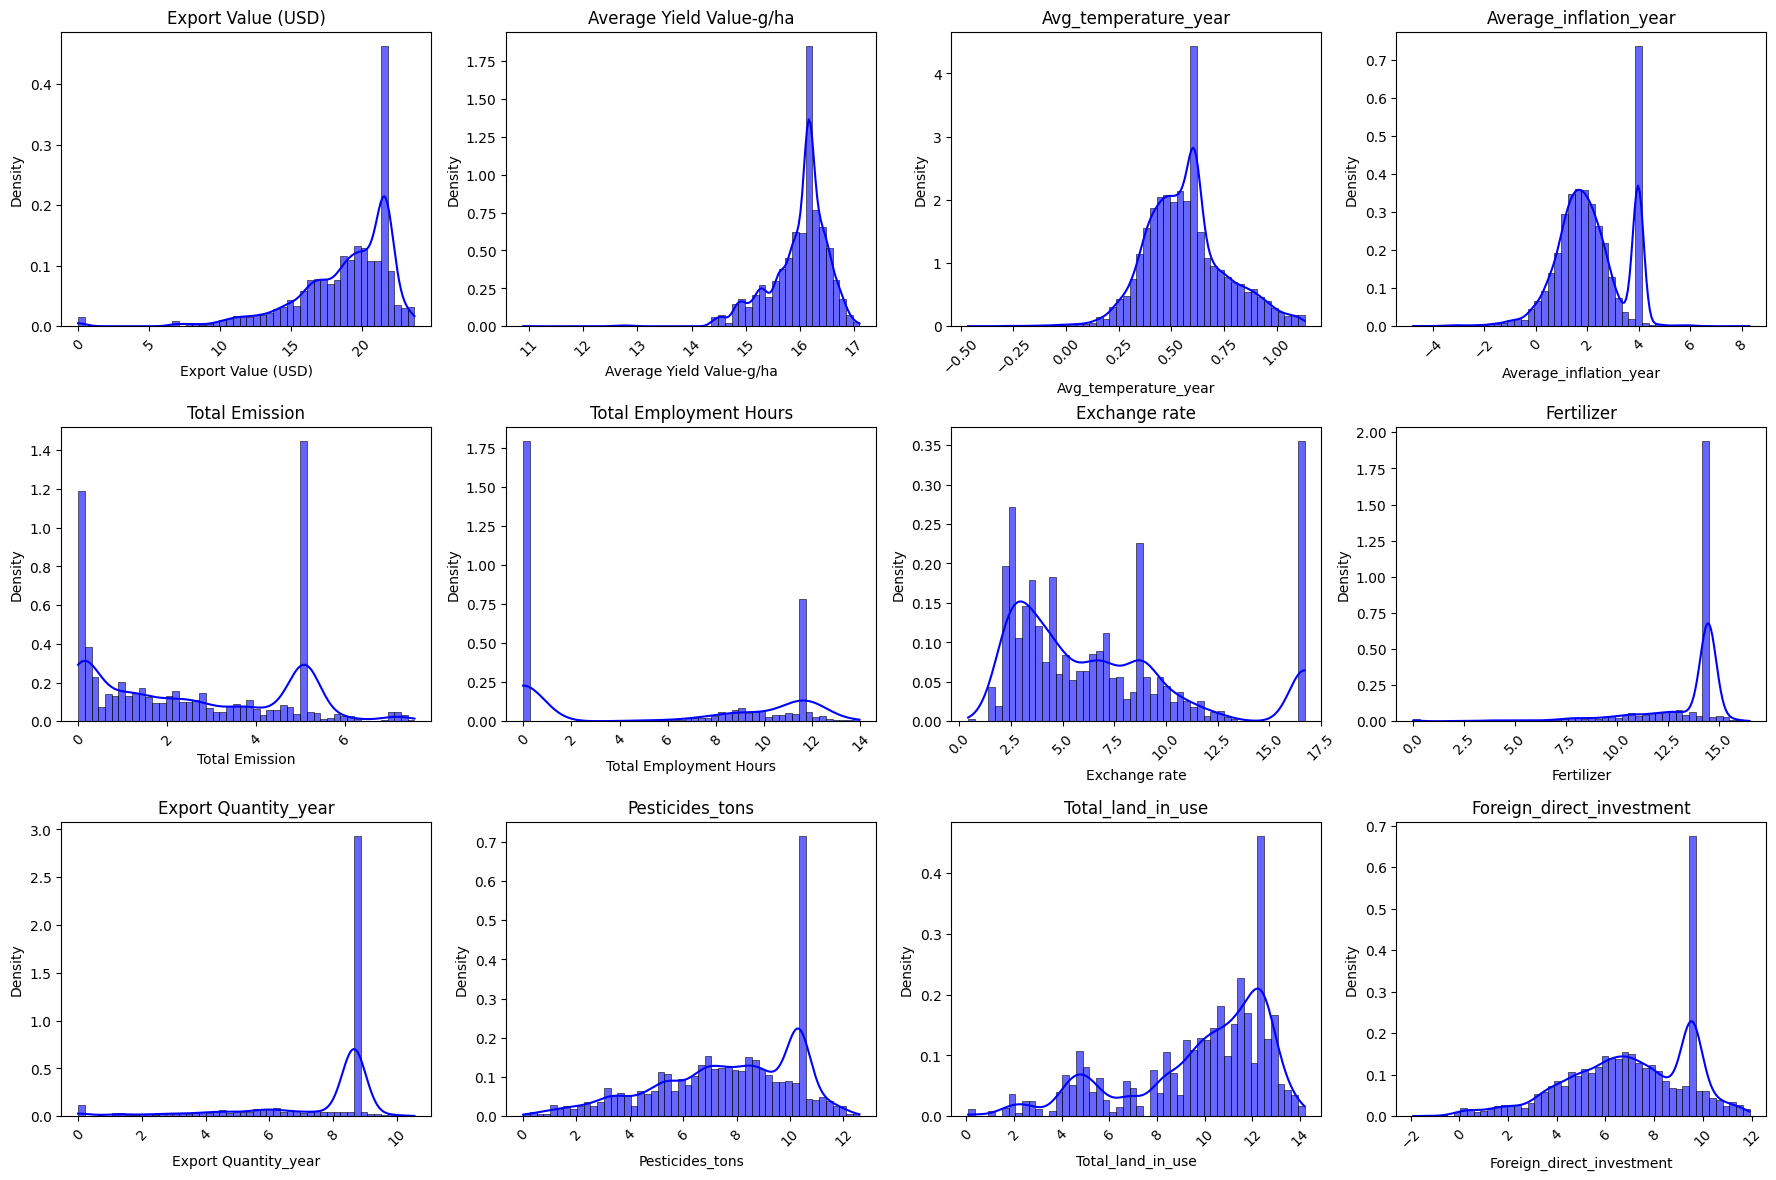

In [95]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming Final_df is your DataFrame

# Select only the float columns from the DataFrame
float_cols = Final_df.select_dtypes(include=['float64']).columns

# Apply log transformation to float columns
Final_df[float_cols] = np.log1p(Final_df[float_cols])

# Define histogram hyperparameters
n_bins = 50
histplot_hyperparams = {
    'kde': True,
    'alpha': 0.6,
    'stat': 'density',
    'bins': n_bins
}

# Calculate number of subplots needed
n_plots = len(float_cols)
n_rows = (n_plots + 3) // 4  # Calculate number of rows needed

# Create subplots dynamically
fig, ax = plt.subplots(n_rows, 4, figsize=(18, n_rows * 4))

# Plot histograms for float columns
for i, column in enumerate(float_cols):
    sns.histplot(
        Final_df[column], label='Train',
        ax=ax[i // 4, i % 4], color='blue', **histplot_hyperparams
    )
    ax[i // 4, i % 4].set_title(column)
    ax[i // 4, i % 4].tick_params(axis='x', labelrotation=45)  # Rotate x-axis labels for better readability

# Hide any empty subplots
for j in range(n_plots, n_rows * 4):
    fig.delaxes(ax[j // 4, j % 4])

plt.tight_layout()
plt.show()


In [96]:
# Define the threshold year
threshold_year = 2020

# Create train_df and test_df based on the threshold year
train_df = Final_df[Final_df['Year'] <= threshold_year]
test_df = Final_df[Final_df['Year'] > threshold_year]

In [97]:
train_df.isnull().sum()


Year                           0
Area Code (M49)                0
Export Value (USD)             0
Average Yield Value-g/ha       0
Avg_temperature_year           0
Average_inflation_year       397
Total Emission                 0
Total Employment Hours         0
Exchange rate                  0
Fertilizer                     0
Export Quantity_year           0
Pesticides_tons                0
Total_land_in_use              0
Foreign_direct_investment    412
dtype: int64

In [98]:
train_df.fillna(0, inplace=True)


<ipython-input-98-55478d664f67>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df.fillna(0, inplace=True)


In [99]:
train_df.isnull().sum()


Year                         0
Area Code (M49)              0
Export Value (USD)           0
Average Yield Value-g/ha     0
Avg_temperature_year         0
Average_inflation_year       0
Total Emission               0
Total Employment Hours       0
Exchange rate                0
Fertilizer                   0
Export Quantity_year         0
Pesticides_tons              0
Total_land_in_use            0
Foreign_direct_investment    0
dtype: int64

In [100]:
test_df.isnull().sum()


Year                          0
Area Code (M49)               0
Export Value (USD)            0
Average Yield Value-g/ha      0
Avg_temperature_year          0
Average_inflation_year       10
Total Emission                0
Total Employment Hours        0
Exchange rate                 0
Fertilizer                    0
Export Quantity_year          0
Pesticides_tons               0
Total_land_in_use             0
Foreign_direct_investment    37
dtype: int64

In [101]:
test_df.fillna(0, inplace=True)


<ipython-input-101-7c00a9aaccb0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df.fillna(0, inplace=True)


In [102]:
test_df.isnull().sum()


Year                         0
Area Code (M49)              0
Export Value (USD)           0
Average Yield Value-g/ha     0
Avg_temperature_year         0
Average_inflation_year       0
Total Emission               0
Total Employment Hours       0
Exchange rate                0
Fertilizer                   0
Export Quantity_year         0
Pesticides_tons              0
Total_land_in_use            0
Foreign_direct_investment    0
dtype: int64

In [103]:
# Assuming 'Export Value (USD)' is the name of your target column
X = train_df.drop(columns=['Export Value (USD)'])
y = train_df['Export Value (USD)']

# Display the shapes of the training set
print("Training set shape (X_train, y_train):", X.shape, y.shape)


Training set shape (X_train, y_train): (8391, 13) (8391,)


In [104]:
from sklearn.model_selection import train_test_split

# Split the data into train, validation, and test sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Further split the training and validation data into 75% training and 25% validation
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

# Display the shapes of the training, validation, and testing sets
print("Training set shape (X_train, y_train):", X_train.shape, y_train.shape)
print("Validation set shape (X_val, y_val):", X_val.shape, y_val.shape)
print("Testing set shape (X_test, y_test):", X_test.shape, y_test.shape)


Training set shape (X_train, y_train): (5034, 13) (5034,)
Validation set shape (X_val, y_val): (1678, 13) (1678,)
Testing set shape (X_test, y_test): (1679, 13) (1679,)


In [105]:
from sklearn.preprocessing import RobustScaler

# Initialize the RobustScaler
scaler = RobustScaler()

# Fit the scaler to the training data and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the validation and testing data using the same scaler
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Display the shapes of the scaled training, validation, and testing sets
print("Scaled Training set shape (X_train_scaled):", X_train_scaled.shape)
print("Scaled Validation set shape (X_val_scaled):", X_val_scaled.shape)
print("Scaled Testing set shape (X_test_scaled):", X_test_scaled.shape)





Scaled Training set shape (X_train_scaled): (5034, 13)
Scaled Validation set shape (X_val_scaled): (1678, 13)
Scaled Testing set shape (X_test_scaled): (1679, 13)


In [106]:
from sklearn.preprocessing import RobustScaler

# Initialize the RobustScaler
scaler = RobustScaler()

# Fit the scaler to the training data and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the validation and testing data using the same scaler
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Display the shapes of the scaled training, validation, and testing sets
print("Scaled Training set shape (X_train_scaled):", X_train_scaled.shape)
print("Scaled Validation set shape (X_val_scaled):", X_val_scaled.shape)
print("Scaled Testing set shape (X_test_scaled):", X_test_scaled.shape)


import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Define and compile the neural network model
model = Sequential([
    Dense(50, activation='relu', input_shape=(X_train_scaled.shape[1],), kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    Dropout(0.2),
    Dense(100, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    Dropout(0.2),
    Dense(1)  # Output layer
])
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Learning rate reduction callback
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)

# Train the model
model.fit(X_train_scaled, y_train, epochs=500, batch_size=256, validation_data=(X_val_scaled, y_val), verbose=1)

# Predict on the validation set
y_val_pred = model.predict(X_val_scaled)
mse_val = mean_squared_error(y_val, y_val_pred)
print("Mean Squared Error on Validation Set:", mse_val)

# Predict on the test set
y_test_pred = model.predict(X_test_scaled)

# Clip the predictions to be non-negative
y_test_pred = np.clip(y_test_pred, 0, None)

# Evaluate the model using Mean Squared Error (MSE) on the test set
mse_test_clipped = mean_squared_error(y_test, y_test_pred)
print("Mean Squared Error on Test Set with Clipped Predictions:", mse_test_clipped)


# Add the year and area code to the predictions for the test set
test_df_with_predictions = X_test.copy()
test_df_with_predictions['Predicted Export Value (USD)'] = y_test_pred
test_df_with_predictions['Actual Export Value (USD)'] = y_test

# Display the first few rows of the DataFrame with predictions for the test set
test_df_with_predictions.head(10)


Scaled Training set shape (X_train_scaled): (5034, 13)
Scaled Validation set shape (X_val_scaled): (1678, 13)
Scaled Testing set shape (X_test_scaled): (1679, 13)
Epoch 1/500
20/20 [==============================] - 1s 12ms/step - loss: 341.5321 - val_loss: 308.7068
Epoch 2/500
20/20 [==============================] - 0s 5ms/step - loss: 273.1057 - val_loss: 227.7020
Epoch 3/500
20/20 [==============================] - 0s 5ms/step - loss: 178.7875 - val_loss: 125.6324
Epoch 4/500
20/20 [==============================] - 0s 5ms/step - loss: 92.9336 - val_loss: 61.7790
Epoch 5/500
20/20 [==============================] - 0s 5ms/step - loss: 54.1379 - val_loss: 35.5925
Epoch 6/500
20/20 [==============================] - 0s 5ms/step - loss: 37.0506 - val_loss: 25.6377
Epoch 7/500
20/20 [==============================] - 0s 5ms/step - loss: 30.5479 - val_loss: 21.7689
Epoch 8/500
20/20 [==============================] - 0s 4ms/step - loss: 27.9144 - val_loss: 19.6042
Epoch 9/500
20/20 [===

,Year,Area Code (M49),Average Yield Value-g/ha,Avg_temperature_year,Average_inflation_year,Total Emission,Total Employment Hours,Exchange rate,Fertilizer,Export Quantity_year,Pesticides_tons,Total_land_in_use,Foreign_direct_investment,Predicted Export Value (USD),Actual Export Value (USD)
6691,2013,170,16.512521,0.456285,0.346436,4.727687,11.884887,10.018054,14.482093,7.501634,11.595482,12.917916,10.093670,22.032660,21.420938
11276,2013,876,16.166771,0.420748,3.977411,5.108428,11.712651,16.708433,14.482093,8.654908,3.064873,3.991204,9.543786,21.445005,21.661846
8297,2017,258,16.790339,0.472875,1.035602,0.000100,0.000000,7.148026,7.510950,1.386294,6.607655,6.762383,4.667957,16.788061,16.397316
1698,2000,204,15.608557,0.330239,3.977411,1.327102,0.000000,9.052865,14.482093,8.654908,7.588329,10.462932,4.163864,17.310444,17.353393
4988,2008,659,14.920124,0.307264,2.168662,0.000000,11.712651,3.508556,5.303305,8.654908,5.202082,4.336244,5.186861,9.953175,9.798183
9162,2019,466,16.328318,0.592553,0.000000,4.298322,0.000000,8.858298,14.482093,5.575949,2.124654,12.960771,6.582926,19.241869,17.569043
4162,2006,504,16.358712,0.708873,1.888258,2.208252,0.000000,4.668586,13.460265,8.654908,10.218116,12.200009,8.135243,20.826317,20.685029
10810,2017,312,16.166771,0.475053,0.903693,0.000000,11.712651,2.455098,14.482093,8.654908,10.335686,6.293438,9.543786,21.814234,21.661846
6877,2013,591,16.321805,0.692547,1.911439,1.019533,9.013944,2.564949,14.482093,6.095825,8.508270,10.045937,5.857676,20.079044,19.206881
7069,2014,446,16.166771,0.501745,1.962339,5.108428,0.000000,4.573117,0.000000,1.386294,5.625064,1.954445,8.328017,16.805000,18.145293


In [107]:
# Ensure the DataFrame has a column for the data instance id (assuming it's named 'id')
if 'id' not in test_df_with_predictions.columns:
    test_df_with_predictions['id'] = test_df_with_predictions.index

# Select only the required columns for the CSV
test_df_for_csv = test_df_with_predictions[['id', 'Actual Export Value (USD)', 'Predicted Export Value (USD)']]

# Save the DataFrame to a CSV file
test_df_for_csv.to_csv('test_df_for_csv', index=False)

# Display the first few rows of the DataFrame with predictions for the test set
test_df_for_csv.head(10)

,id,Actual Export Value (USD),Predicted Export Value (USD)
6691,6691,21.420938,22.032660
11276,11276,21.661846,21.445005
8297,8297,16.397316,16.788061
1698,1698,17.353393,17.310444
4988,4988,9.798183,9.953175
9162,9162,17.569043,19.241869
4162,4162,20.685029,20.826317
10810,10810,21.661846,21.814234
6877,6877,19.206881,20.079044
7069,7069,18.145293,16.805000


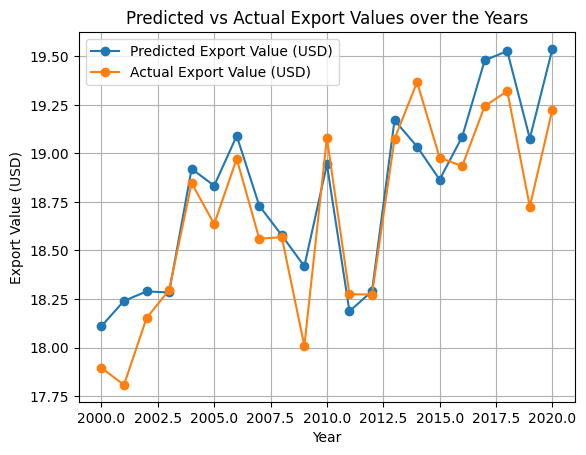

In [108]:
import matplotlib.pyplot as plt

# Group the predictions by year and calculate the mean
predicted_values_by_year = test_df_with_predictions.groupby('Year')['Predicted Export Value (USD)'].mean()

# Group the actual values by year and calculate the mean
actual_values_by_year = test_df_with_predictions.groupby('Year')['Actual Export Value (USD)'].mean()

# Plot the predicted values
plt.plot(predicted_values_by_year.index, predicted_values_by_year.values, label='Predicted Export Value (USD)', marker='o')

# Plot the actual values
plt.plot(actual_values_by_year.index, actual_values_by_year.values, label='Actual Export Value (USD)', marker='o')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Export Value (USD)')
plt.title('Predicted vs Actual Export Values over the Years')

# Add legend
plt.legend()

# Show the plot
plt.grid(True)
plt.show()


Epoch 1/500


<ipython-input-109-f4e1419742d7>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Final_df.fillna(0, inplace=True)


29/29 [==============================] - 1s 9ms/step - loss: 314.7706 - val_loss: 344.8462 - lr: 0.0010
Epoch 2/500
29/29 [==============================] - 0s 4ms/step - loss: 190.2732 - val_loss: 147.8996 - lr: 0.0010
Epoch 3/500
29/29 [==============================] - 0s 4ms/step - loss: 75.0902 - val_loss: 40.3385 - lr: 0.0010
Epoch 4/500
29/29 [==============================] - 0s 4ms/step - loss: 42.8049 - val_loss: 31.2480 - lr: 0.0010
Epoch 5/500
29/29 [==============================] - 0s 4ms/step - loss: 33.5628 - val_loss: 26.8837 - lr: 0.0010
Epoch 6/500
29/29 [==============================] - 0s 4ms/step - loss: 28.7173 - val_loss: 24.7162 - lr: 0.0010
Epoch 7/500
29/29 [==============================] - 0s 4ms/step - loss: 25.9634 - val_loss: 24.7917 - lr: 0.0010
Epoch 8/500
29/29 [==============================] - 0s 4ms/step - loss: 23.6345 - val_loss: 23.9124 - lr: 0.0010
Epoch 9/500
29/29 [==============================] - 0s 4ms/step - loss: 21.5479 - val_loss: 23.

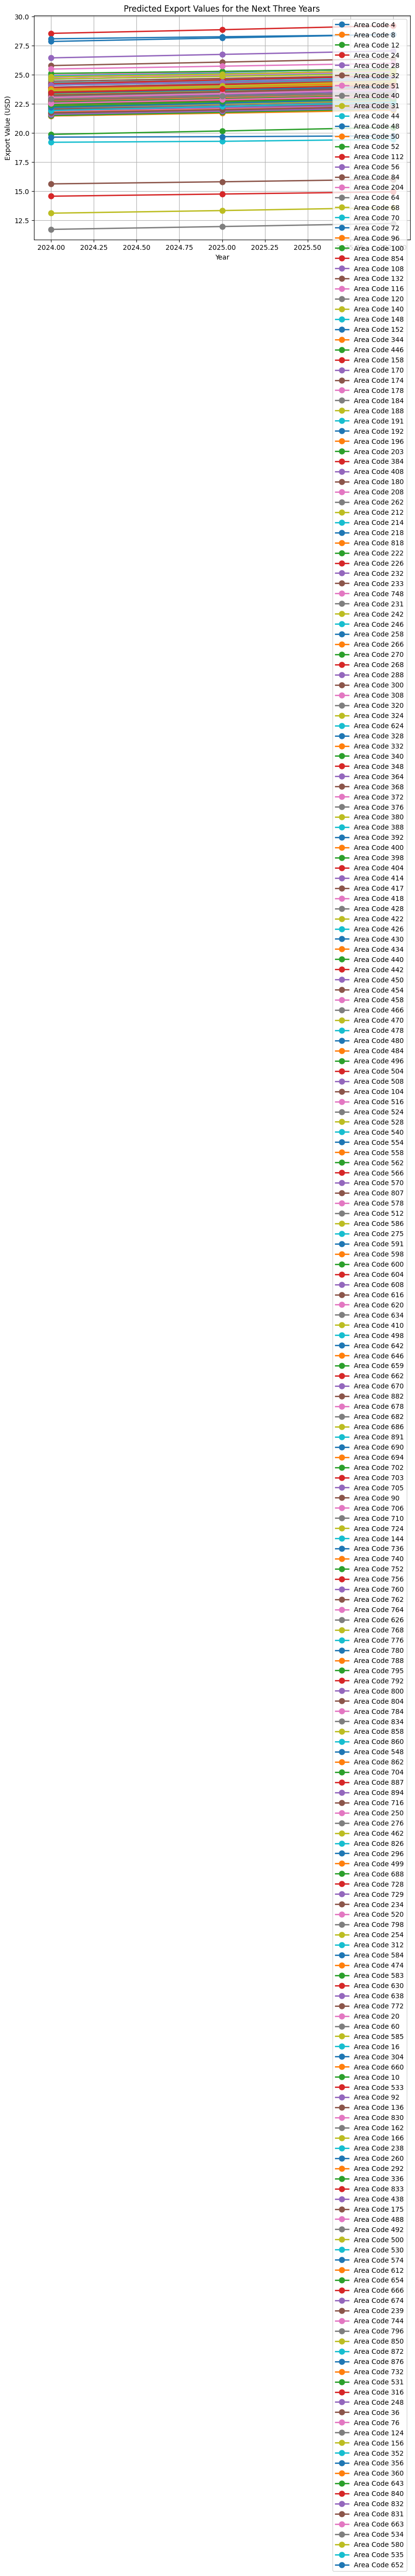

In [109]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import tensorflow as tf


# Handle NaN values appropriately
Final_df.fillna(0, inplace=True)

# Extract features and target
X_final = Final_df.drop(columns=['Export Value (USD)'])
y_final = Final_df['Export Value (USD)']

# Initialize the RobustScaler
scaler = RobustScaler()

# Fit the scaler to the entire data and transform it
X_final_scaled = scaler.fit_transform(X_final)

# Define and compile the neural network model
model = Sequential([
    Dense(50, activation='relu', input_shape=(X_final_scaled.shape[1],), kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    Dropout(0.2),
    Dense(100, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    Dropout(0.2),
    Dense(1)  # Output layer
])
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Learning rate reduction callback
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)

# Train the model using the entire dataset
history = model.fit(X_final_scaled, y_final, epochs=500, batch_size=256, verbose=1, validation_split=0.2, callbacks=[early_stopping, reduce_lr])

# Prepare data for the next three years (2024, 2025, 2026) for each area code
future_years = [2024, 2025, 2026]
area_codes = Final_df['Area Code (M49)'].unique()

# Generate features for the next three years
def generate_features_for_year(year, last_known_features, area_code):
    # Example logic to generate future features
    # Implement logic to generate future features based on trends, averages, or other statistical methods
    future_features = last_known_features.copy()
    future_features['Year'] = year  # Example: modify the year feature
    future_features['Area Code (M49)'] = area_code  # Include the area code
    return future_features

# Use the last known features to generate future features for each area code
future_predictions = []

for area_code in area_codes:
    last_known_features = X_final[Final_df['Area Code (M49)'] == area_code].iloc[-1].copy()
    future_features = [generate_features_for_year(year, last_known_features, area_code) for year in future_years]

    # Convert the list of features into a DataFrame
    future_data_with_features = pd.DataFrame(future_features)

    # Scale the future data using the same scaler used for training
    future_data_with_features_scaled = scaler.transform(future_data_with_features)

    # Make predictions for the next three years
    predictions = model.predict(future_data_with_features_scaled)

    for year, prediction in zip(future_years, predictions):
        future_predictions.append((area_code, year, prediction[0]))

# Convert predictions to DataFrame for easier plotting and display
predictions_df = pd.DataFrame(future_predictions, columns=['Area Code (M49)', 'Year', 'Predicted Export Value (USD)'])

# Display the prediction table
print(predictions_df)

# Plotting the predicted export values
plt.figure(figsize=(10, 6))
for area_code in area_codes:
    area_code_predictions = predictions_df[predictions_df['Area Code (M49)'] == area_code]
    plt.plot(area_code_predictions['Year'], area_code_predictions['Predicted Export Value (USD)'], marker='o', linestyle='-', linewidth=2, markersize=8, label=f'Area Code {area_code}')

plt.title('Predicted Export Values for the Next Three Years')
plt.xlabel('Year')
plt.ylabel('Export Value (USD)')
plt.grid(True)
plt.legend()
plt.show()
